# Naive Bayes

O algoritmo tem por objetivo calcular a probabilidade que a amostra pertença a uma classe do conjunto de classes. É uma classificação estatística, pois é totalmente baseada em probabilidade.

<img src="assets/nb00.png"/>

É um classificador probabilístico simples baseado no teorema de Bayes. O algoritmo não considera correlações entre as variáveis/atributos.
São usados principalmente em:
* Classificação de textos/filtragem de spam/Análise de sentimento;
* Previsões em tempo real;
* Sistemas de recomendação.

<img src="assets/nb01.png"/>

**Teorema de Bayes**<br/>
Em teoria da probabilidade o teorema de bayes mostra a relação entre a relação da probabilidade condicional e sua inversa. Por exemplo: A probabilidade de uma hipótese dada a observação de uma evidência e a probabilidade da evidência dada pela hipótese.

A regra de Bayes mostra como alterar as probabilidades a priori tendo em conta novas evidências de forma a obter probabilidades a posteriori.


**Vantagens e Desvantagens**<br/>
**Vantagens:**
* É fácil e rápido para prever o conjunto de dados da classe de teste. Também tem um bom desempenho na previsão de classes múltiplas. 
* Quando a suposição de independência prevalece, um classificador Naive Bayes tem melhor desempenho em comparação com outros modelos como regressão logística, e você precisa de menos dados de treinamento. 
* O desempenho é bom em caso de variáveis categóricas de entrada em comparação a variáveis numéricas. Para variáveis numéricas, assume-se a distribuição normal (curva de sino, que é uma suposição forte).

**Desvantegens:**<br/>
* Se a variável categórica tem uma categoria (no conjunto de dados de teste) que não foi observada no conjunto de dados de treinamento, então o modelo irá atribuir uma probabilidade de 0 (zero) e não será capaz de fazer uma previsão. Isso é muitas vezes conhecido como “Zero Frequency”. Para resolver esse problema, podemos usar a técnica de ”suavização” (smoothing). Uma das técnicas mais simples de ” suavização” (smoothing) é a chamada estimativa de Laplace.
* Uma limitação do Naive Bayes é a suposição de preditores independentes. Na vida real, é quase impossível ter um conjunto de indicadores que sejam completamente independentes.


**Dicas para otimizar o modelo Naive Bayes**
* Utilizar os dados com distribuição normal;
* Se o conjunto de dados de teste tem problema de frequência zero, aplique a técnica de suavização “Laplace Correction” para prever a classe no conjunto de dados de teste.
* Remova variáveis correlacionadas. Os atributos altamente correlacionadas podem levar a um excesso de importância de uma característica, reduzindo a capacidade de generalização do modelo.
* Classificadores Naive Bayes têm opções limitadas para ajuste de parâmetros, tais como como alfa = 1 para suavização, fit_prior = [Verdade | Falso] para aprendizagem a partir de probabilidades anteriores. Nós recomendamos focar no pré-processamento de dados e seleção de atributos.
* Você pode querer aplicar alguma técnica ensemble como “bagging” e “boosting”, mas na prática esses métodos não ajudariam, pois a finalidade destes métodos é reduzir a variância. Naive Bayes não tem variância para minimizar.


http://scikit-learn.org/stable/modules/naive_bayes.html

## Gaussian Naive Bayes (GaussianNB) - Scikit-Learn

Ao lidar com dados contínuos, uma suposição típica é que os valores contínuos associados a cada classe são distribuídos de acordo com uma distribuição gaussiana (distribuição normal).

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

### Gaussian Naive Bayes - Exemplo 1

In [1]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

# Dataset
iris = datasets.load_iris()

# Classificador
clf = GaussianNB()

# Modelo
modelo = clf.fit(iris.data, iris.target)

# Previsões
y_pred = modelo.predict(iris.data)

# Imprime o resultado
print("Total de Observações: %d - Total de Previsões Incorretas : %d" 
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

Total de Observações: 150 - Total de Previsões Incorretas : 6


### Gaussian Naive Bayes - Exemplo 2

In [2]:
# Gaussian Naive Bayes - Exemplo 2
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# Dataset
dataset = datasets.load_iris()

# Classificador 
clf = GaussianNB()

# Modelo
modelo = clf.fit(dataset.data, dataset.target)
print(modelo)

# Previsões
observado = dataset.target
previsto = modelo.predict(dataset.data)

# Sumário
print(metrics.classification_report(observado, previsto))
print(metrics.confusion_matrix(observado, previsto))

GaussianNB()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


### Gaussian Naive Bayes - Exemplo 3

Machine Learning and Data Mining for Astronomy - http://www.astroml.org/

Obs: É necessário instalar o LaTeX de acordo com a versão do seu sistema operacional.

In [5]:
#!pip install astroML

c:\ProgramData\Anaconda3\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


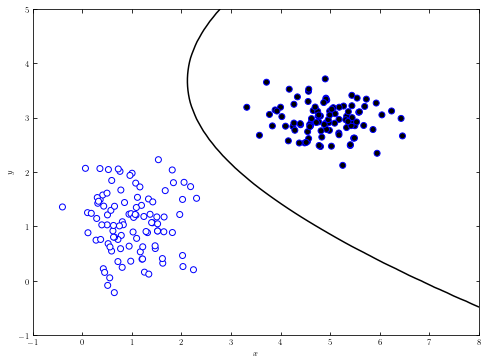

In [6]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from astroML.plotting import setup_text_plots
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline


setup_text_plots(fontsize = 8, usetex = True)

# Criando massa de dados 
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)
mu2 = [5, 3]
cov2 = np.eye(2) * np.array([0.4, 0.1])

# Concatenando
X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])
y = np.zeros(200)
y[100:] = 1

# Criação do Modelo
clf = GaussianNB()
clf.fit(X, y)

# Previsões
xlim = (-1, 8)
ylim = (-1, 5)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71), np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# Plot dos resultados
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.binary, zorder = 2)

ax.contour(xx, yy, Z, [0.5], colors = 'k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

### Gaussian Naive Bayes - Exemplo 4

In [7]:
import numpy as np
from random import random
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pylab as pl
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

In [8]:
# Massa de dados representando 3 classes
leopardo_features = [(random() * 5 + 8, random() * 7 + 12) for x in range(5)]
urso_features = [(random() * 4 + 3, random() * 2 + 30) for x in range(4)]
elefante_features = [(random() * 3 + 20, (random() - 0.5) * 4 + 23) for x in range(6)]

# X
x = urso_features + elefante_features + leopardo_features

# Y
y = ['urso'] * len(urso_features) + ['elefante'] * len(elefante_features) + ['leopardo'] * len(leopardo_features)

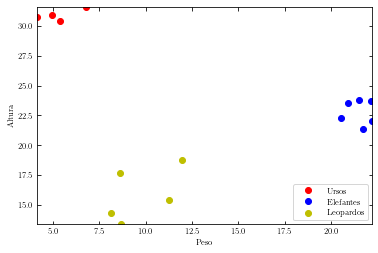

In [9]:
# Plot dos dados
fig, axis = plt.subplots(1, 1)

# Classe 1
urso_weight, urso_height = zip(*urso_features)
axis.plot(urso_weight, urso_height, 'ro', label = 'Ursos')

# Classe 2
elefante_weight, elefante_height = zip(*elefante_features)
axis.plot(elefante_weight, elefante_height, 'bo', label = 'Elefantes')

# Classe 3
leopardo_weight, leopardo_height = zip(*leopardo_features)
axis.plot(leopardo_weight, leopardo_height, 'yo', label = 'Leopardos')

# Eixos
axis.legend(loc = 4)
axis.set_xlabel('Peso')
axis.set_ylabel('Altura')

# Plot
plt.show()

In [10]:
# Criando o Modelo com os dados de treino
clf = GaussianNB()
clf.fit(x, y)

# Criando dados de teste
new_xses = [[2, 3], [3, 31], [21, 23], [12, 16]]

# Previsões
print (clf.predict(new_xses))
print (clf.predict_proba(new_xses))

['leopardo' 'urso' 'elefante' 'leopardo']
[[5.37257550e-301 1.00000000e+000 0.00000000e+000]
 [5.94965317e-214 2.32345778e-016 1.00000000e+000]
 [1.00000000e+000 2.26402867e-015 3.92273971e-133]
 [8.43596026e-063 1.00000000e+000 5.67271450e-272]]


In [11]:
def plot_classification_results(clf, X, y, title):
    # Divide o dataset em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    # Fit dos dados com o classificador
    clf.fit(X_train, y_train)

    # Cores para o gráfico
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = .02  # step size in the mesh
    
    # Plot da fronteira de decisão.
    # Usando o meshgrid do NumPy e atribuindo uma cor para cada ponto 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Previsões
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Resultados em cada cor do plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot dos pontos de dados de treino
    pl.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cmap_bold)

    y_predicted = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    pl.scatter(X_test[:, 0], X_test[:, 1], c = y_predicted, alpha = 0.5, cmap = cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.title(title)
    return score

In [12]:
xs = np.array(x)
ys = [0] * len(urso_features) + [1] * len(elefante_features) + [2] * len(leopardo_features)

C:\Users\krupc\AppData\Local\Temp/ipykernel_21776/2880349916.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl.pcolormesh(xx, yy, Z, cmap=cmap_light)


Classification score was: 1.0


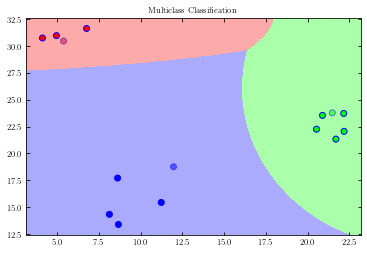

In [13]:
score = plot_classification_results(clf, xs, ys, "Multiclass Classification")
print ("Classification score was: %s" % score)

### Usando o dataset iris

[0 1 2]
(90, 4) (90,)
(60, 4) (60,)


C:\Users\krupc\AppData\Local\Temp/ipykernel_21776/2880349916.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pl.pcolormesh(xx, yy, Z, cmap=cmap_light)


0.9444444444444444

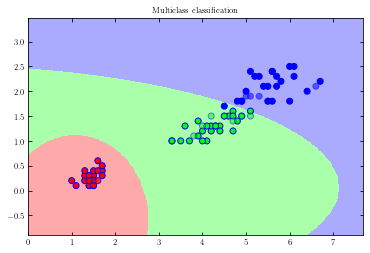

In [14]:
import numpy as np
from sklearn import datasets

# Dataset
iris = datasets.load_iris()

# Imprimindo as 3 classes do dataset
print(np.unique(iris.target))

# Split dos dados
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

# Shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Classificador
clf = GaussianNB()

# Resultado
plot_classification_results(clf, X_train[:, 2:4], y_train, "Multiclass classification")